# Gráficas con los datos preprocesados

In [4]:
import numpy as np
#np.set_printoptions(threshold='nan')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Para abrir Explorador de archivos
from tkinter import Tk 
from tkinter.filedialog import askopenfilename
from tkinter import re #operaciones de matching de expresiones regulares

In [5]:
def moving_average(data, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def visualize(path1):
    #data import
    data = pd.read_csv(path1).values
    amp = data[1:len(data),1:91]

    #plt
    fig = plt.figure(figsize = (18,10))
    ax1 = plt.subplot(311)
    plt.imshow(amp[:,0:29].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    ax1.set_title("Antenna1 Amplitude")
    plt.colorbar()

    ax2 = plt.subplot(312)
    plt.imshow(amp[:,30:59].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    ax2.set_title("Antenna2 Amplitude")
    plt.colorbar()

    ax3 = plt.subplot(313)
    plt.imshow(amp[:,60:89].T,interpolation = "nearest", aspect = "auto", cmap="jet")
    ax3.set_title("Antenna3 Amplitude")
    plt.colorbar()
    plt.show()
    
    # Initializing valiables
    constant_offset = np.empty_like(amp)
    filtered_data = np.empty_like(amp)

    # Calculating the constant offset (moving average 4 seconds)
    for i in range(1, len(amp[0])):
        constant_offset[:,i] = moving_average(amp[:,i], 4000)

    # Calculating the filtered data (substract the constant offset)
    filtered_data = amp - constant_offset

    # Smoothing (moving average 0.01 seconds)
    for i in range(1, len(amp[0])):
        filtered_data[:,i] = moving_average(filtered_data[:,i], 10)
    # Calculate correlation matrix (90 * 90 dim)
    cov_mat2 = np.cov(filtered_data.T)
    # Calculate eig_val & eig_vec
    eig_val2, eig_vec2 = np.linalg.eig(cov_mat2)
    # Sort the eig_val & eig_vec
    idx = eig_val2.argsort()[::-1]
    eig_val2 = eig_val2[idx]
    eig_vec2 = eig_vec2[:,idx]
    # Calculate H * eig_vec
    pca_data2 = filtered_data.dot(eig_vec2)
    
    xmin = 0
    xmax = 20000
    # plt
    fig3 = plt.figure(figsize = (18,20))

    ax1 = plt.subplot(611)
    plt.plot(pca_data2[xmin:xmax,0])
    #plt.plot(pca_data2[2500:17500,0])
    ax1.set_title("PCA 1st component")

    ax2 = plt.subplot(612)
    plt.plot(pca_data2[xmin:xmax,1])
    #plt.plot(pca_data2[2500:17500,1])
    ax2.set_title("PCA 2nd component")

    ax3 = plt.subplot(613)
    plt.plot(pca_data2[xmin:xmax,2])
    #plt.plot(pca_data2[2500:17500,2])
    ax3.set_title("PCA 3rd component")

    ax4 = plt.subplot(614)
    plt.plot(pca_data2[xmin:xmax,3])
    #plt.plot(pca_data2[2500:17500,3])
    ax4.set_title("PCA 4th component")

    ax5 = plt.subplot(615)
    plt.plot(pca_data2[xmin:xmax,4])
    #plt.plot(pca_data2[2500:17500,4])
    ax5.set_title("PCA 5th component")

    ax6 = plt.subplot(616)
    plt.plot(pca_data2[xmin:xmax,5])
    #plt.plot(pca_data2[2500:17500,5])
    ax6.set_title("PCA 6th component")

    plt.show()
    
    plt.figure(figsize = (18,30))
    # Spectrogram(STFT)
    plt.subplot(611)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,0], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(612)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,1], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(613)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,2], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(614)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,3], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.subplot(615)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,4], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)
    
    plt.subplot(616)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,5], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)
    
    plt.show()
    
    plt.figure(figsize = (18,10))
    ax = plt.subplot(111)
#    ax.magnitude_spectrum(pca_data2[:,0], Fs=1000, scale='dB', color='C1')
    ax.magnitude_spectrum(pca_data2[5000:7500,0], Fs=1000, color='C1')
    plt.xlim(0,100)
    plt.ylim(0,1000)
    plt.show()

## Se solicita el archivo csv

In [9]:
root = Tk() #Elimina la ventana de Tkinter
root.withdraw() #Ahora se cierra
file_path = askopenfilename() #Se abre el explorador de archivos y se guarda la selección
splitted = file_path.split("/")
folder_name = splitted[-2]
file_name = splitted[-1]

## Nombre del archivo

In [11]:
file_name

'input_SU_200311_14_12.csv'

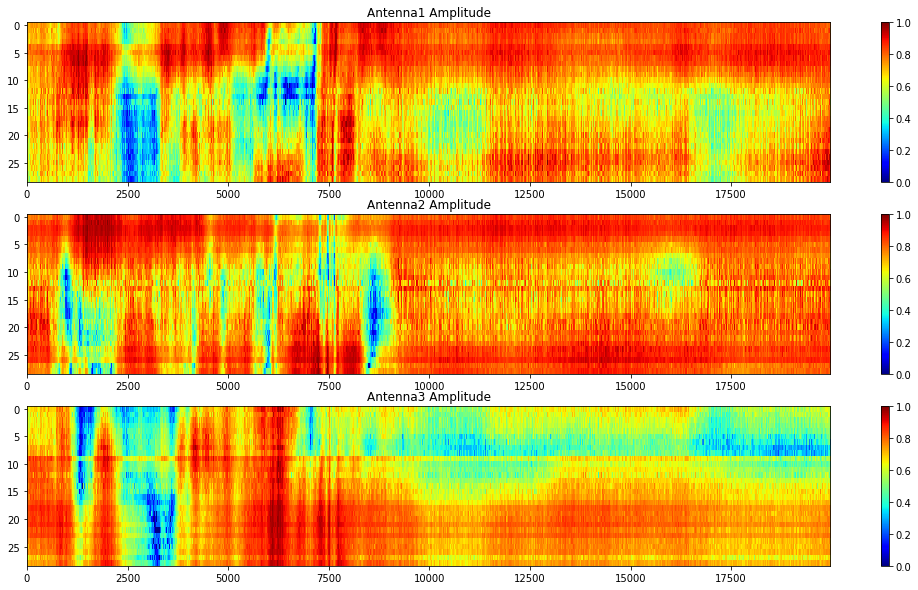

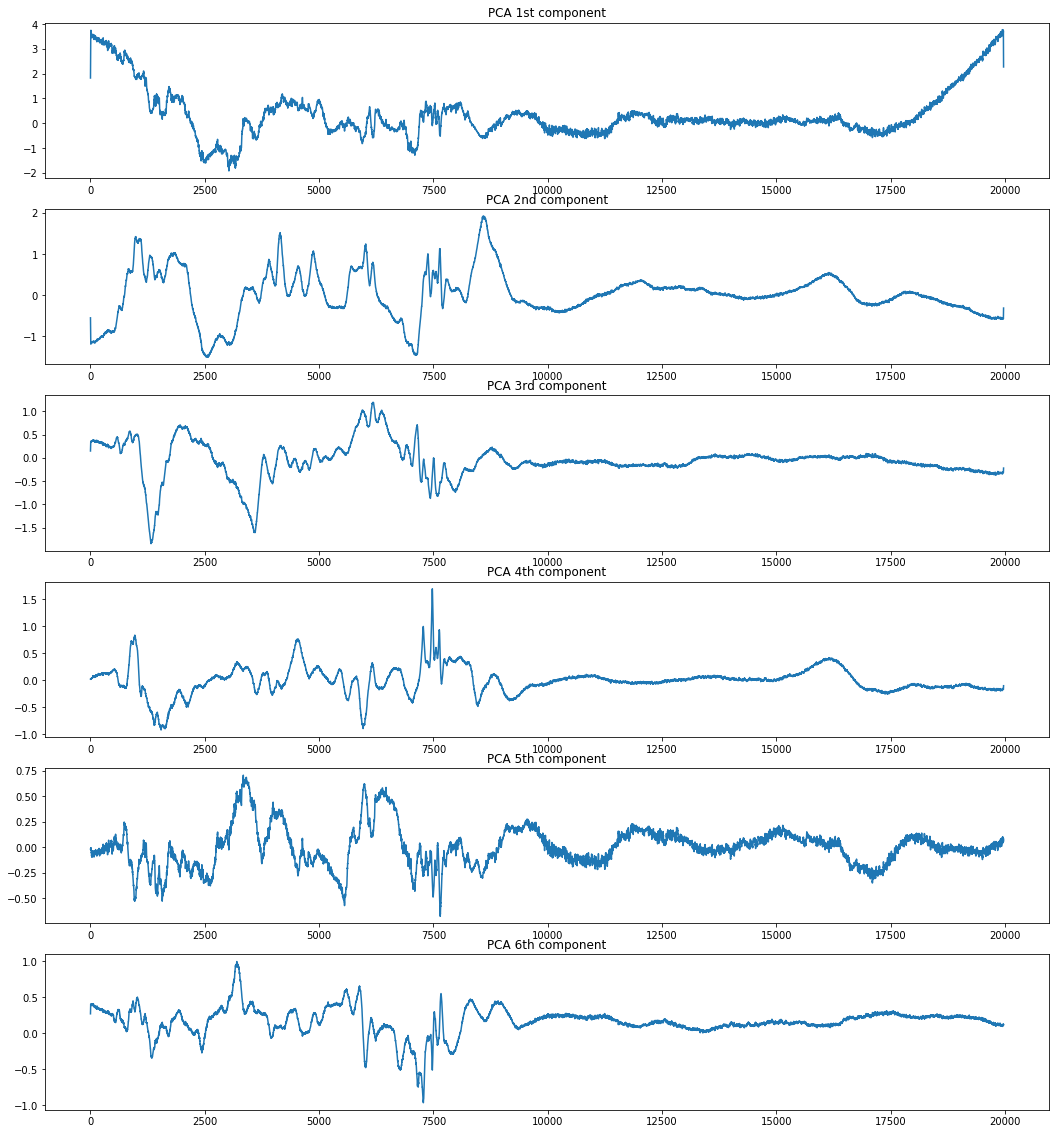

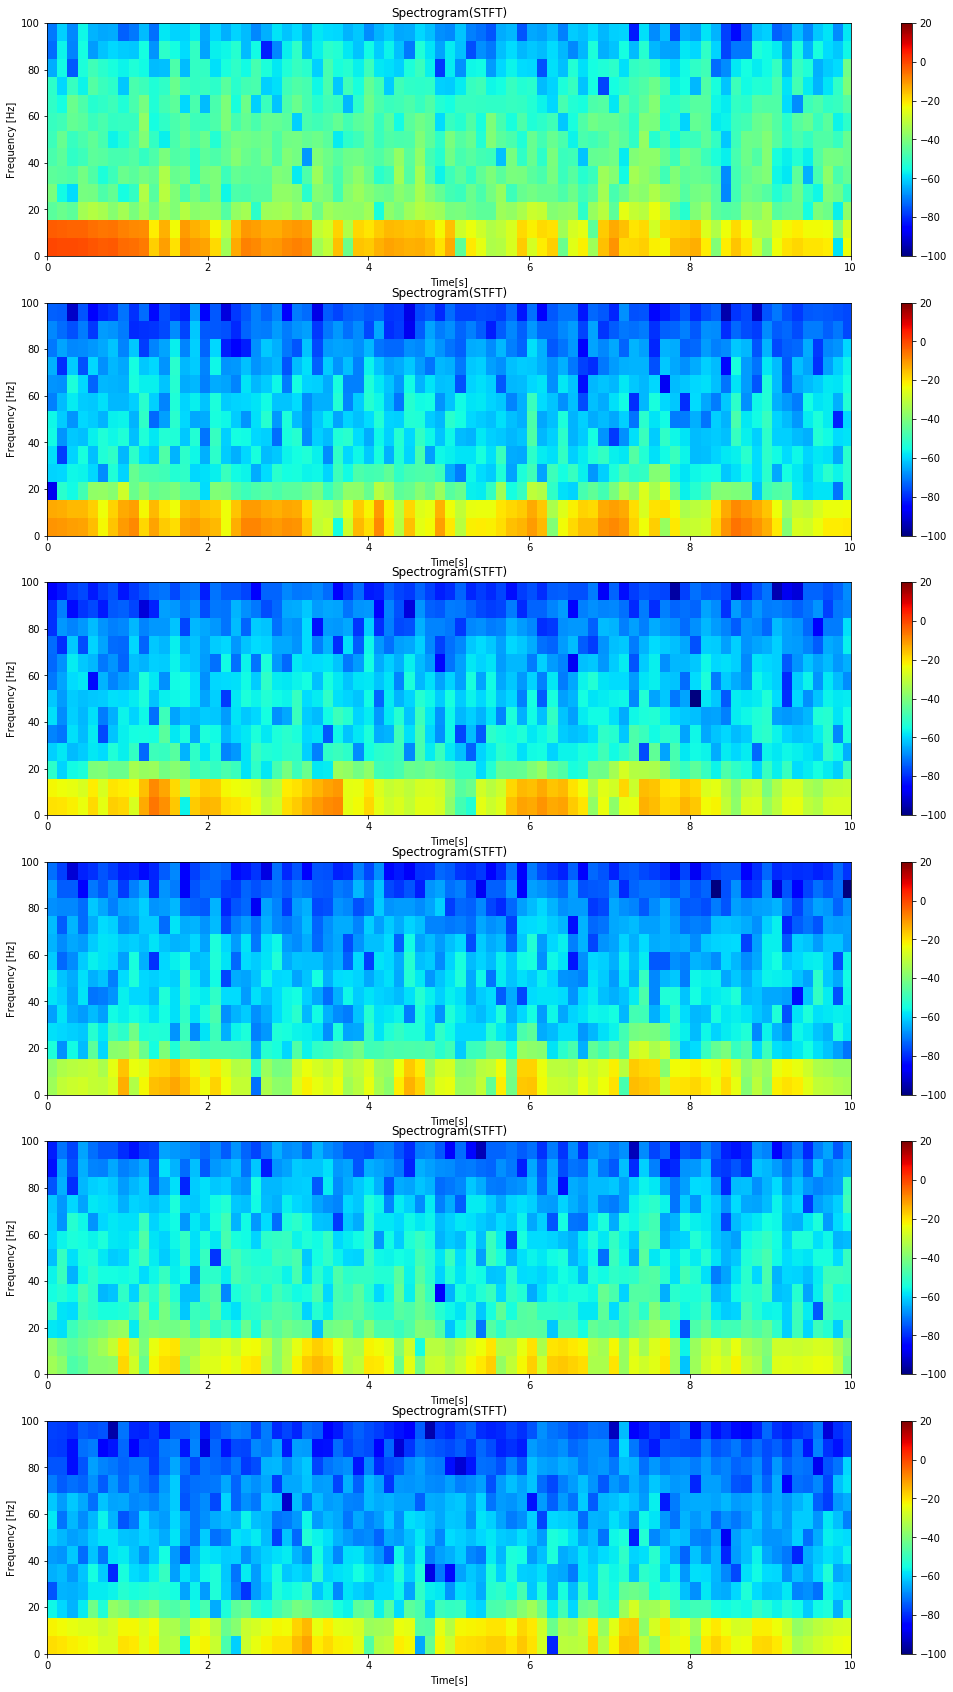

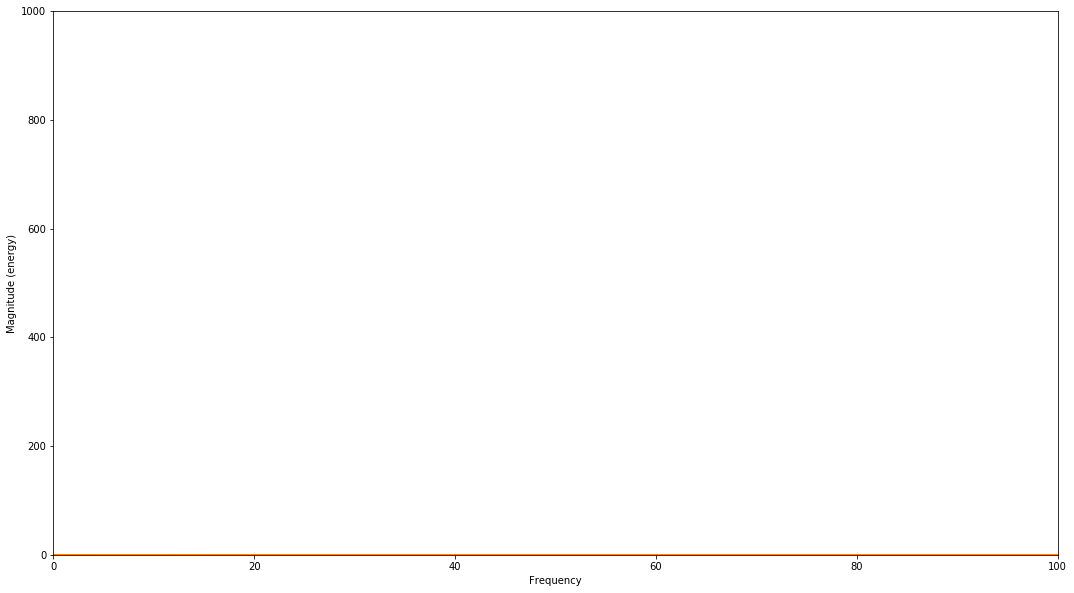

In [10]:
visualize(path1 = folder_name + "/" + file_name)